In [ ]:
# Simple(독립변수 1개) Linear Regression을 구현해 보아요!
# 사용하는 데이터는 ozone데이터를 이용할꺼예요!
# 태양광세기, 바람, 온도를 기반으로 ozoen량이 결정되는데
# 이걸 측정한 데이터

In [ ]:
# Python 직접구현

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 수치미분 코드
def numerical_derivative(f,x):

    # f : 미분하려고하는 다변수 함수
    # x : 모든 변수를 포함하는 ndarray  [1.0 2.0]
    # 리턴되는 결과는 [8.0 15.0]

    delta_x = 1e-4
    derivative_x = np.zeros_like(x)   #  [0.0 0.0]

    it = np.nditer(x, flags=['multi_index'])

    while not it.finished:

        idx = it.multi_index  # 현재의 index를 추출 => tuple형태로 리턴.

        tmp = x[idx]    # 현재 index의 값을 일단 잠시 보존해야해요!
                        # 밑에서 이 값을 변경해서 중앙차분 값을 계산해야 해요!
                        # 그런데 우리 편미분해야해요. 다음 변수 편미분할때
                        # 원래값으로 복원해야 편미분이 정상적으로 진행되기 때문에
                        # 이값을 잠시 보관했다가 원상태로 복구해야 해요!
        x[idx] = tmp + delta_x
        fx_plus_delta_x = f(x)  # f(x + delta_x)

        x[idx] = tmp - delta_x
        fx_minus_delta_x = f(x) # f(x - delta_x)

        derivative_x[idx] = (fx_plus_delta_x - fx_minus_delta_x) / (2 * delta_x)

        x[idx] = tmp

        it.iternext()

    return derivative_x

# Raw Data Loading
df = pd.read_csv('/content/drive/MyDrive/[AI_SCHOOL_9기]/data/ozone/ozone.csv')
# display(df)  # 153 rows × 6 columns

training_data = df[['Temp', 'Ozone']]
# display(training_data)

# 이렇게 데이터를 가져온 후 당연히 데이터 전처리를 해야 해요!
# 1. 결측치 처리!
#    지금은 그냥 냅다 삭제할 꺼예요! (데이터 많은 경우 가장 좋은 방법)
training_data = training_data.dropna(how='any')
# display(training_data) # 116 rows × 2 columns

# Training Data Set 준비
x_data = training_data['Temp'].values.reshape(-1,1)
t_data = training_data['Ozone'].values.reshape(-1,1)

# Model을 만들어야 하는데.. y = Wx + b
W = np.random.rand(1,1)
b = np.random.rand(1)

# loss function(MSE)
def loss_func(input_data):

    input_w = input_data[0]
    input_b = input_data[1]

    y = np.dot(x_data, input_w) + input_b

    return np.mean(np.power((t_data-y),2))

# 모델이 완성된 후 예측하는 함수를 하나 만들어요!
def predict(x):

    return np.dot(x, W) + b

# learning rate 정의(hyperparameter)
learning_rate = 1e-4

# 학습진행
for step in range(300000):

    input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)
    derivative_result = learning_rate * numerical_derivative(loss_func, input_param)

    W = W - derivative_result[0].reshape(-1,1)
    b = b - derivative_result[1]

    if step % 30000 == 0:
        print(f'W : {W}, b : {b}, loss : {loss_func(input_param)}')


,Temp,Ozone
0,67,41.0
1,72,36.0
2,74,12.0
3,62,18.0
5,66,28.0
...,...,...
147,63,14.0
148,70,30.0
150,75,14.0
151,76,18.0


W : [[0.64940181]], b : [0.39370595], loss : 1722.0009506185907
W : [[0.71877258]], b : [-11.88364441], loss : 817.3132721850769
W : [[0.86119627]], b : [-23.13739107], loss : 775.0641145280255
W : [[0.99175719]], b : [-33.45378976], loss : 739.5598907535547
W : [[1.11144342]], b : [-42.91091416], loss : 709.723795178526
W : [[1.22116073]], b : [-51.580335], loss : 684.6509304734398
W : [[1.32173946]], b : [-59.52766176], loss : 663.5808630801425
W : [[1.41394078]], b : [-66.81303914], loss : 645.8745600635787
W : [[1.49846246]], b : [-73.49160229], loss : 630.9950079169748
W : [[1.57594416]], b : [-79.61389402], loss : 618.4909255076185


[[16.88607015]]


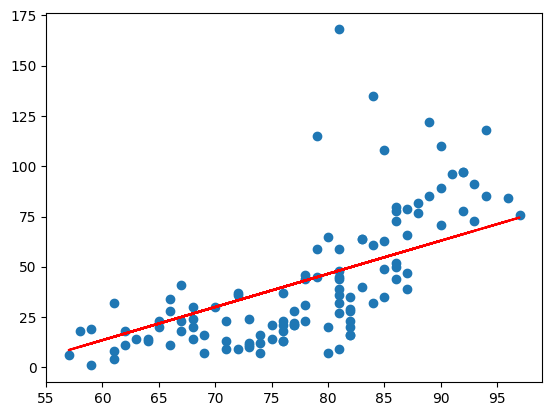

In [ ]:
# 학습종료 후 예측
# 온도가 62도일때 Ozone량은 얼마?
print(predict(np.array([[62]])))  # [[16.88607015]]
# 이거 맞는거야???
# 그래프로 확인해 보아요!
# (독립변수 1개니까 2차원 평면에 모델을 그릴수 있어요!)

# 데이터를 2차원 평면에 찍어보아요!
plt.scatter(x_data, t_data)
# 우리 모델을 그려보아요!
plt.plot(x_data, x_data*W.ravel() + b, color='r')
plt.show()

In [ ]:
# 같은 내용을 이제 Tensorflow Keras를 이용해서 구현!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

# Raw Data Loading
df = pd.read_csv('/content/drive/MyDrive/[AI_SCHOOL_9기]/data/ozone/ozone.csv')

training_data = df[['Temp', 'Ozone']]

# 이렇게 데이터를 가져온 후 당연히 데이터 전처리를 해야 해요!
# 1. 결측치 처리!
training_data = training_data.dropna(how='any')

# Training Data Set 준비
x_data = training_data['Temp'].values.reshape(-1,1)
t_data = training_data['Ozone'].values.reshape(-1,1)

# Model 생성
model = Sequential()

model.add(Flatten(input_shape=(1,)))

output_layer = Dense(units=1,
                     activation='linear')

model.add(output_layer)

# model 설정
model.compile(optimizer=SGD(learning_rate=1e-4),
              loss='mse')

# model 학습
model.fit(x_data,
          t_data,
          epochs=2000,
          verbose=0)

1/1 [==============================] - 0s 22ms/step
[[39.92358]]


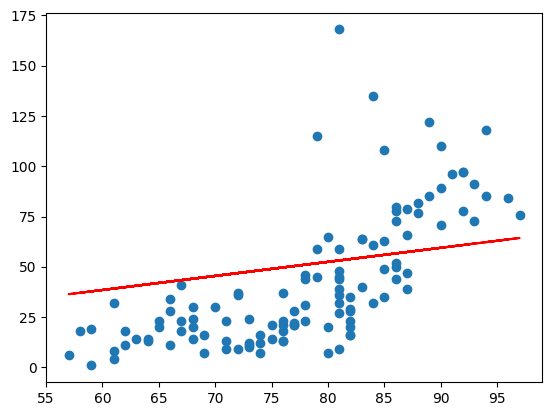

In [ ]:
# 학습이 끝났으니 예측을 해 보아요!
print(model.predict(np.array([[62]])))  # [[39.92358]]

# 그래프로 확인해 보아요!
# W와 b가 필요해요!
weights, bias = output_layer.get_weights()

# 데이터를 2차원 평면에 찍어보아요!
plt.scatter(x_data, t_data)
# 우리 모델을 그려보아요!
plt.plot(x_data, x_data*weights + bias, color='r')
plt.show()

[[3.58411393]]


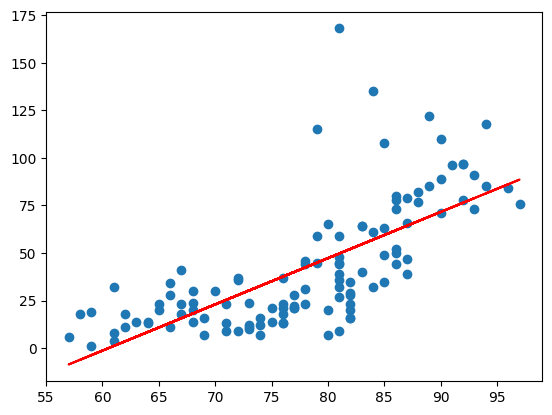

In [ ]:
# 정답(?)을 확인하기 위해 sklearn 구현을 해 보아요!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model


# Raw Data Loading
df = pd.read_csv('/content/drive/MyDrive/[AI_SCHOOL_9기]/data/ozone/ozone.csv')

training_data = df[['Temp', 'Ozone']]

# 이렇게 데이터를 가져온 후 당연히 데이터 전처리를 해야 해요!
# 1. 결측치 처리!
training_data = training_data.dropna(how='any')

# Training Data Set 준비
x_data = training_data['Temp'].values.reshape(-1,1)
t_data = training_data['Ozone'].values.reshape(-1,1)

# Model 생성
sklearn_model = linear_model.LinearRegression()

# Model 학습
sklearn_model.fit(x_data, t_data)

# W와 b를 알아야지 나중에 그래프를 그릴 수 있겠죠.
weights = sklearn_model.coef_
bias = sklearn_model.intercept_

# 예측을 해 보아요!
print(sklearn_model.predict(np.array([[62]])))  # [[3.58411393]]

# 데이터를 2차원 평면에 찍어보아요!
plt.scatter(x_data, t_data)
# 우리 모델을 그려보아요!
plt.plot(x_data, x_data*weights + bias, color='r')
plt.show()

8.0
4.5
11.5
7.0
22.0
-6.0
[22.1]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]


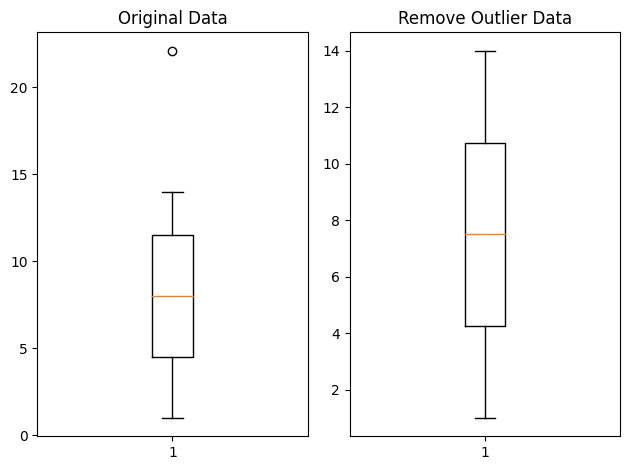

In [28]:
# Tukey's Fence 방식으로 이상치를 검출해보아요!

import numpy as np
import matplotlib.pyplot as plt

data = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,22.1])

fig = plt.figure()

fig_1 = fig.add_subplot(1,2,1)  # 1행 2열의 첫번째
fig_2 = fig.add_subplot(1,2,2)  # 1행 2열의 두번째

print(np.median(data))  # 8.0
print(np.percentile(data,25))  # 4.5
print(np.percentile(data,75))  # 11.5

# IQR value
iqr_value = np.percentile(data,75) - np.percentile(data,25)
print(iqr_value)  # 7.0

upper_fence = np.percentile(data,75) + 1.5 * iqr_value
print(upper_fence)  # 22.0
lower_fence = np.percentile(data,25) - 1.5 * iqr_value
print(lower_fence)  # -6.0

# 아하!! 이렇게 tukey fence방식을 이용하면 이상치를 구분하는
# 기준선을 알아낼 수 있네요!

# 내가 가지고 있는 데이터에 대해 이상치를 출력해보세요!
# boolean indexing을 이용해요!

print(data[(data > upper_fence) | (data < lower_fence)])  # [22.1]

# 데이터를 정제하는게 목적이예요. 이상치를 제거하는게 목적!
result_data = data[(data <= upper_fence) & (data >= lower_fence)]
print(result_data)

fig_1.set_title('Original Data')
fig_1.boxplot(data)

fig_2.set_title('Remove Outlier Data')
fig_2.boxplot(result_data)

plt.tight_layout()
plt.show()


In [35]:
# 정규분포(Z-score)를 이용한 이상치 구별방식
# 이 방식을 이용하려면
# 기본적으로 우리 데이터를 정규분포화 시켜서 우리 데이터에 대한
# z-score값을 각각 구해야 되요!
# 그리고 기준치를 설정한 다음 그 기준치를 넘는 데이터를 이상치로 판별

from scipy import stats

data = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,22.1])

zscore_threshold = 2.0 # 일반적으로 2.0을 많이 사용.

# print(np.abs(stats.zscore(data)) > zscore_threshold)
outlier = data[np.abs(stats.zscore(data)) > zscore_threshold] # [22.1]

# 이상치를 제거한 결과
print(data[np.isin(data,outlier, invert=True)])

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]


In [ ]:
# python 구현과 tensorflow 구현, sklearn 구현을
# 이상치를 제거한 데이터를 이용해서 학습시키고 결과 그래프를 출력해
# 보아요! 그리고 62도에서의 예측치를 각각 구해보아요!

# 각자 구현을 해 보세요!

In [39]:
from scipy import stats

# 데이터는 공통으로 사용하니 먼저 사용하는 데이터 정제부터 하고
# 각각 구현하는게 좋을 듯 싶어요!

# Raw Data Loading
df = pd.read_csv('/content/drive/MyDrive/[AI_SCHOOL_9기]/data/ozone/ozone.csv')

training_data = df[['Temp', 'Ozone']]

# 이렇게 데이터를 가져온 후 당연히 데이터 전처리를 해야 해요!
# 1. 결측치 처리!
training_data = training_data.dropna(how='any')
# 2. 이상치 처리!
zscore_threshold = 1.8

outlier = training_data['Ozone'][np.abs(stats.zscore(training_data['Ozone'].values)) > zscore_threshold]

# print(outlier)

# 이상치를 제거한 결과를 얻어야 해요!
# 내가 가진 DataFrame에서 이상치를 제거하면 되요!
training_data = training_data.loc[np.isin(training_data['Ozone'],outlier, invert=True)]

# Training Data Set 준비
x_data = training_data['Temp'].values.reshape(-1,1)
t_data = training_data['Ozone'].values.reshape(-1,1)


In [ ]:
# Python 직접구현

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 수치미분 코드
def numerical_derivative(f,x):

    # f : 미분하려고하는 다변수 함수
    # x : 모든 변수를 포함하는 ndarray  [1.0 2.0]
    # 리턴되는 결과는 [8.0 15.0]

    delta_x = 1e-4
    derivative_x = np.zeros_like(x)   #  [0.0 0.0]

    it = np.nditer(x, flags=['multi_index'])

    while not it.finished:

        idx = it.multi_index  # 현재의 index를 추출 => tuple형태로 리턴.

        tmp = x[idx]    # 현재 index의 값을 일단 잠시 보존해야해요!
                        # 밑에서 이 값을 변경해서 중앙차분 값을 계산해야 해요!
                        # 그런데 우리 편미분해야해요. 다음 변수 편미분할때
                        # 원래값으로 복원해야 편미분이 정상적으로 진행되기 때문에
                        # 이값을 잠시 보관했다가 원상태로 복구해야 해요!
        x[idx] = tmp + delta_x
        fx_plus_delta_x = f(x)  # f(x + delta_x)

        x[idx] = tmp - delta_x
        fx_minus_delta_x = f(x) # f(x - delta_x)

        derivative_x[idx] = (fx_plus_delta_x - fx_minus_delta_x) / (2 * delta_x)

        x[idx] = tmp

        it.iternext()

    return derivative_x

# Model을 만들어야 하는데.. y = Wx + b
W = np.random.rand(1,1)
b = np.random.rand(1)

# loss function(MSE)
def loss_func(input_data):

    input_w = input_data[0]
    input_b = input_data[1]

    y = np.dot(x_data, input_w) + input_b

    return np.mean(np.power((t_data-y),2))

# 모델이 완성된 후 예측하는 함수를 하나 만들어요!
def predict(x):

    return np.dot(x, W) + b

# learning rate 정의(hyperparameter)
learning_rate = 1e-4

# 학습진행
for step in range(300000):

    input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)
    derivative_result = learning_rate * numerical_derivative(loss_func, input_param)

    W = W - derivative_result[0].reshape(-1,1)
    b = b - derivative_result[1]

    if step % 30000 == 0:
        print(f'W : {W}, b : {b}, loss : {loss_func(input_param)}')

# 학습종료 후 예측
# 온도가 62도일때 Ozone량은 얼마?
print(predict(np.array([[62]])))  # [[15.51232223]]

In [41]:
# 같은 내용을 이제 Tensorflow Keras를 이용해서 구현!

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

# Model 생성
model = Sequential()

model.add(Flatten(input_shape=(1,)))

output_layer = Dense(units=1,
                     activation='linear')

model.add(output_layer)

# model 설정
model.compile(optimizer=SGD(learning_rate=1e-4),
              loss='mse')

# model 학습
model.fit(x_data,
          t_data,
          epochs=2000,
          verbose=0)

# 학습이 끝났으니 예측을 해 보아요!
print(model.predict(np.array([[62]])))  # [[37.21062]]

# 그래프로 확인해 보아요!
# W와 b가 필요해요!
weights, bias = output_layer.get_weights()

1/1 [==============================] - 0s 50ms/step
[[37.21062]]


In [42]:
# 정답(?)을 확인하기 위해 sklearn 구현을 해 보아요!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model


# Model 생성
sklearn_model = linear_model.LinearRegression()

# Model 학습
sklearn_model.fit(x_data, t_data)

# 예측을 해 보아요!
print(sklearn_model.predict(np.array([[62]])))  # [[4.51299041]]

[[4.51299041]]


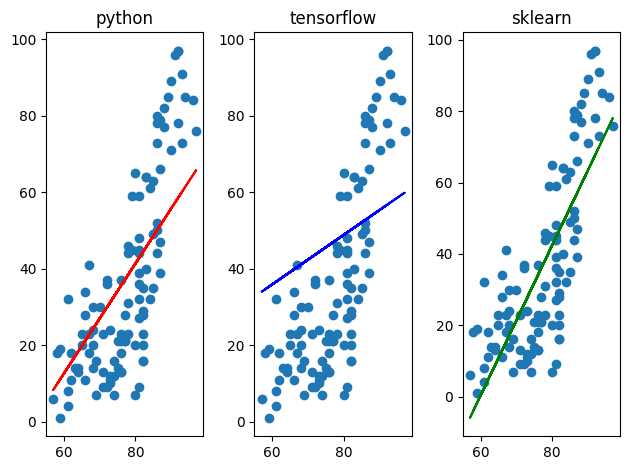

In [43]:
####### 결과를 그래프로 확인해 보아요! #########

fig = plt.figure()

fig_python = fig.add_subplot(1,3,1)
fig_tensorflow = fig.add_subplot(1,3,2)
fig_sklearn = fig.add_subplot(1,3,3)

fig_python.set_title('python')
fig_tensorflow.set_title('tensorflow')
fig_sklearn.set_title('sklearn')

fig_python.scatter(x_data, t_data)
fig_python.plot(x_data, x_data*W.ravel() + b, color='r')

fig_tensorflow.scatter(x_data, t_data)
fig_tensorflow.plot(x_data, x_data*weights + bias, color='b')

fig_sklearn.scatter(x_data, t_data)
fig_sklearn.plot(x_data,
                 x_data*sklearn_model.coef_ + sklearn_model.intercept_,
                 color='g')

plt.tight_layout()
plt.show()